## Phase 3

#                                  Can Gun Violence In United States be controlled?

**Course Name :** Data Intensive Computing<br>
**Phase :** 3<br>
**Term Project Name :** Gun Violence In United States

## 1. Problem Statement: 
 Gun violence has become a grim reality of life in the United States. According to data from the Pew Research Center, 44 percent of Americans say that they know someone who has been shot, and another 23 percent report that a gun has been used to threaten or intimidate them or a family member. United States ranks higher than many other developed countries when it comes to gun violence. Right from child to adult, every age group is involved in these crimes. Are the lenient laws are responsible for increasing number of gun violence? Is getting gun without a permit adding up to the increased numbers of crime?
There are many such questions we would like to find solution on. As this is one of the major factor inhibiting growth of US, we have to think on this.


## 2. Hypothesis:
The rate of gun violence incidents depends on the level of gun restriction. 
Specifically states that restrict gun sale to younger citizens will have lower amounts of gun incidents.
We also predict that population distribution will have a significant effect on the amount of gun violence incidents.
We predict that states that have more males in it's population will have higher numbers of gun violence incidents.

### Random Forest Regressor  performed best on our data

## 3 Cleaned Datasets
Cleaned dataset after phase 1

In [1]:
# import libraries required fro prediction and visualisation
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as sm
import statsmodels.formula.api as statsm

sns.set_style('dark')

ModuleNotFoundError: No module named 'sklearn'

In [51]:
#Linear Regression needs all the columns in integers so we have converted string columns to integer ones. We will use this for modeling.
df = pd.read_csv("./p3_data/one_hot_encoded_data.csv")
df.head()

,state,year,n_participants_teen,age18longgunpossess,permit,city_or_county,age21longgunpossess,n_participant_adult,age21longgunsale,felony,...,n_participant_male,n_participants_child,age18longgunsale,age21handgunsale,age21longgunsaled,training,age21handgunpossess,permith,mentalhealth,n_incidents
0,0,2014,0.0,0,0,22,0,1.0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,2
1,0,2014,0.0,0,0,26,0,1.0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,1
2,0,2014,0.0,0,0,228,0,0.0,0,0,...,1.0,1.0,0,0,0,0,0,0,0,1
3,0,2014,0.0,0,0,245,0,1.0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,1
4,0,2014,0.0,0,0,302,0,1.0,0,0,...,1.0,0.0,0,0,0,0,0,0,0,1


In [52]:
df.describe()

,state,year,n_participants_teen,age18longgunpossess,permit,city_or_county,age21longgunpossess,n_participant_adult,age21longgunsale,felony,...,n_participant_male,n_participants_child,age18longgunsale,age21handgunsale,age21longgunsaled,training,age21handgunpossess,permith,mentalhealth,n_incidents
count,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,...,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000,42182.000000
mean,23.401712,2016.012493,0.279764,0.227870,0.168674,4656.841378,0.021099,1.827675,0.002916,0.747286,...,1.729411,0.059860,0.492366,0.272699,0.002916,0.127187,0.134441,0.309231,0.276232,1.628159
std,14.440547,0.989627,0.751684,0.419463,0.374468,2715.142654,0.143716,1.646624,0.053921,0.434574,...,1.359089,0.329797,0.499948,0.445353,0.053921,0.333186,0.341130,0.462182,0.447138,1.710660
min,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,2015.000000,0.000000,0.000000,0.000000,2285.250000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,23.000000,2016.000000,0.000000,0.000000,0.000000,4638.500000,0.000000,2.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,2017.000000,0.000000,0.000000,0.000000,7004.000000,0.000000,2.000000,0.000000,1.000000,...,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,49.000000,2017.000000,20.000000,1.000000,1.000000,9455.000000,1.000000,128.000000,1.000000,1.000000,...,86.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


## 4 Modeling  
Model is Regression Model as it is predicting a continuous-valued attribute associated with an object. So we will apply regression algorithms for prediction.

In [53]:
# Input variables
X = df[df.columns.difference(['n_incidents'])]

# create our y-array and assign it to a variable called y.
Y = df['n_incidents']

Computing regression accuracy

In [54]:
# RMSE (Root Mean Squared Error) can be considered as a good performance metrics for all models with this dataset
# because, in RMSE errors are squared before taking average, i.e it gives relatively high weight to large erros.
# In this dataset, it is particularly considered to be undersirable to have large errors because it means
# we are not predicting number of incidents relatively more accurately. In real world, this will result in
# putting more resources by authorities than expected to prevent these incidents.

def regression_metrics(predictions):
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions), 2)) 
    print("Root Mean squared error =", round(sm.mean_squared_error(y_test, predictions, squared=False), 2)) 

## 4.1 Method 1

### 1. What assumptions need to be verified at this step?

We need to check whether our model is linear or non-linear. So that we can choose algorithms which work best on this type of data.<br>The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).<br>

### 2. What algorithm did you choose?
Linear Regression

### 3. Why you choose this algorithm?
The objective is to predict is n_incidents i.e number of incidents based on input features like, male/female population ratio, age group ratios, state and city_or_county etc. This can be framed as a Regression problem. The linear regression model can give us a decent base line for model performance which will eventually help us choose better model. Also, it might help us give better insight to understand whether the data has linear or non-linear relationships.

### 4. What metric can measure the quality of your algorithm?
RMSE (Root Mean Square Error) and R2. The reason behind having two performance metrics is, the R2 will give us how good the linear model can fit to a horizontal line. The lower R2 score, the more bad fit the model will have. But this can't alone tell us whether our model is good or bad because R2 is trying to fit a horizontal line so in case of non-linear data it will have low scores. Due to this, we will need a another metrics too, in this case, that will be RMSE since it can also be used with non-linear models.

### 5. What is the outcome?
We did the regression analysis on the linear regression model.

- From the variance inflation factor, we realised that few features have VIF greater than 10 which means significant multicollinearity. To handle this we did the PowerTransformation using the `yeo-johnson` method so that probability distribution of the feature/variable more Gaussian. This help us remove the skew in the distribution of that feature.

- We plot the QQ plot to check if the data fulfills the normality assumption of the linear regression. The plot shows that it does not really follow the red line, which means data is non-linear in nature. This could be one of the reason behind low R2 score, since it also tries to fit model along the horizontal line.  

### 6. Analysis and Discussion:
We did the regression analysis on the linear regression model.
From the variance inflation factor, we realised that few features have VIF greater than 10 which means significant multicollinearity. To handle this we did the PowerTransformation using the yeo-johnson method so that probability distribution of the feature/variable more Gaussian. This help us remove the skew in the distribution of that feature.

We plot the QQ plot to check if the data fulfills the normality assumption of the linear regression. The plot shows that it does not really follow the red line, which means data is non-linear in nature. This could be one of the reason behind low R2 score, since it also tries to fit model along the horizontal line.

- Cross Validation

Used K-Fold Cross Validation
- This is used to make sure model does not overfit the data. Using different test sets in each iteration and taking mean of performance metrics (here, RMSE) made sure model is not getting overfit and has almost same RMSE value has of random test-train data split.
- Checked the p-values for each feature and it looks like all of the features are significant i.e p-values are less than 10e-3.

In [55]:
df.columns

Index(['state', 'year', 'n_participants_teen', 'age18longgunpossess', 'permit',
       'city_or_county', 'age21longgunpossess', 'n_participant_adult',
       'age21longgunsale', 'felony', 'n_participant_female',
       'n_participant_male', 'n_participants_child', 'age18longgunsale',
       'age21handgunsale', 'age21longgunsaled', 'training',
       'age21handgunpossess', 'permith', 'mentalhealth', 'n_incidents'],
      dtype='object')

In [63]:
#examine each of the model’s coefficients
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42182 entries, 0 to 42181
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 42182 non-null  int64  
 1   year                  42182 non-null  int64  
 2   n_participants_teen   42182 non-null  float64
 3   age18longgunpossess   42182 non-null  int64  
 4   permit                42182 non-null  int64  
 5   city_or_county        42182 non-null  int64  
 6   age21longgunpossess   42182 non-null  int64  
 7   n_participant_adult   42182 non-null  float64
 8   age21longgunsale      42182 non-null  int64  
 9   felony                42182 non-null  int64  
 10  n_participant_female  42182 non-null  float64
 11  n_participant_male    42182 non-null  float64
 12  n_participants_child  42182 non-null  float64
 13  age18longgunsale      42182 non-null  int64  
 14  age21handgunsale      42182 non-null  int64  
 15  age21longgunsaled  

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

# Create a pipeline to train linear regression model
lr_pipeline = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("power", PowerTransformer(method='yeo-johnson')),
    ("model", LinearRegression())
])

lr_pipeline.fit(x_train, y_train)
predictions = lr_pipeline.predict(x_test)

regression_metrics(predictions)
print("R2 score =", round(sm.r2_score(y_test, predictions), 2))

Mean absolute error = 0.92
Mean squared error = 2.89
Root Mean squared error = 1.7
R2 score = 0.04


In [64]:
# Regression Analysis for Linear Regression

from statsmodels.formula.api import ols

formula = f"n_incidents ~ {' + '.join(X.columns)}"
lr_ols_model = ols(formula, data=df).fit() 
print(lr_ols_model.summary())


# Check if all input features are statistically significant based on their p-values
df_result=pd.DataFrame()
df_result['pvalues']=lr_ols_model.pvalues[1:]
df_result['Features']=df.columns[:-1]
df_result.set_index('Features',inplace=True)
df_result['Statistically significant?']= df_result['pvalues'].apply(lambda x:"Yes" if x else "No")
df_result

                            OLS Regression Results                            
Dep. Variable:            n_incidents   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     65.26
Date:                Sat, 10 Apr 2021   Prob (F-statistic):          7.14e-235
Time:                        13:00:58   Log-Likelihood:                -81920.
No. Observations:               42182   AIC:                         1.639e+05
Df Residuals:                   42163   BIC:                         1.640e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -279.4196 

,pvalues,Statistically significant?
Features,,
state,3.116685e-02,Yes
year,6.566534e-01,Yes
n_participants_teen,3.224485e-02,Yes
age18longgunpossess,6.130923e-02,Yes
permit,3.647490e-02,Yes
city_or_county,8.651669e-03,Yes
age21longgunpossess,8.651669e-03,Yes
n_participant_adult,6.664369e-02,Yes
age21longgunsale,8.277487e-01,Yes


<Figure size 576x360 with 0 Axes>

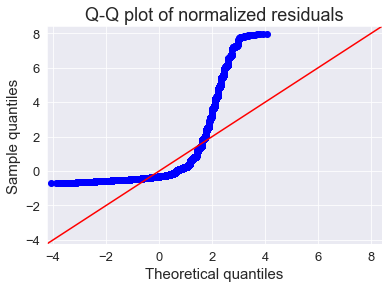

In [65]:
# Checking the normality assumption for linear regression

from statsmodels.graphics.gofplots import qqplot

plt.figure(figsize=(8,5))
fig=qqplot(lr_ols_model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# The diagram clearly shows that normality assumption is not true which means data is non-linear in nature
# 

In [66]:
# Checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(X.columns)):
    v=vif(np.matrix(df[:-1]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

# There are few features with VIF > 10, thereby indicating significant multicollinearity

Variance inflation factor for state: 4.89
Variance inflation factor for year: 15.0


C:\Users\Aboli\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Variance inflation factor for n_participants_teen: inf
Variance inflation factor for age18longgunpossess: 2.12
Variance inflation factor for permit: 3.67
Variance inflation factor for city_or_county: 4.01
Variance inflation factor for age21longgunpossess: 1.6
Variance inflation factor for n_participant_adult: inf
Variance inflation factor for age21longgunsale: inf
Variance inflation factor for felony: 5.05
Variance inflation factor for n_participant_female: inf
Variance inflation factor for n_participant_male: inf
Variance inflation factor for n_participants_child: inf
Variance inflation factor for age18longgunsale: 3.8
Variance inflation factor for age21handgunsale: 4.55
Variance inflation factor for age21longgunsaled: inf
Variance inflation factor for training: 3.81
Variance inflation factor for age21handgunpossess: 3.15
Variance inflation factor for permith: 6.09
Variance inflation factor for mentalhealth: 2.58


In [8]:
# Testing the Performance of our Model
# Mean absolute error
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

0.9623322483278515

## Linear Regression with Cross Validation

In [67]:
# Using same linear regression pipeline from above

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(
    lr_pipeline, 
    X, 
    Y, 
    cv=cv, 
    n_jobs=-1, 
    error_score='raise', 
    scoring='neg_mean_squared_error'
)

rmse = np.mean(np.sqrt(np.absolute(n_scores)))
print(f"mean_squared_error : {rmse}")

mean_squared_error : 1.6814595522764118


#### Setting up a non-linear data pipeline, so that it can be used in upcoming analysis

In [68]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1)

# Remove outliers
yhat = iso.fit_predict(X)
mask = yhat != -1
iso_Y = Y[mask]
iso_X = X[mask]

# Splitting our Data Set into Training Data and Test Data
x_train, x_test, y_train, y_test = train_test_split(iso_X, iso_Y, test_size = 0.1, random_state=1)

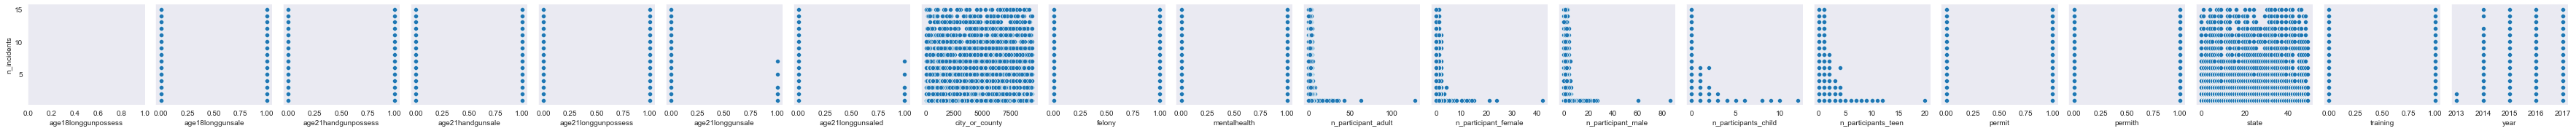

In [69]:
sns.pairplot(df, x_vars=X.columns.tolist(), y_vars='n_incidents')
plt.show()

#### From the pair plots it looks like data is not linear

## 4.1 Method 2

<b><h3> 1. What assumptions need to be verified at this step?</b></h3>
To eliminate multicollinearity in data models. If Observations are fewer than predictor variables
Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

###  2. What algorithm did you choose?
Ridge Regression

### 3. Why you choose this algorithm?
To avoid over fitting by adding a penalty to models that have too large coefficients.

### 4. What metric can measure the quality of your algorithm?
R2 score.

### 5. What is the outcome?
 R2 score is less than the model from Linear Regression 

### 6. Analysis and Discussion:
Ridge regression is used to adjust variance but it is not providing better solution to our data

# Ridge Regression

In [71]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
print("Mean squared Error for Training",mean_squared_error(y_train,pred_train_rr))
print("R2 score for Training",r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test)

Mean squared Error for Training 2.9654250701449585
R2 score for Training 0.03109073358526948


In [72]:
print("Mean squared Error on Testing data",mean_squared_error(y_test,pred_test_rr)) 
print("R2 score on Testing data",r2_score(y_test, pred_test_rr))

Mean squared Error on Testing data 2.713562707947329
R2 score on Testing data 0.029553046326187826


[Text(0.5, 0, 'Observation'), Text(0, 0.5, 'Prediction')]

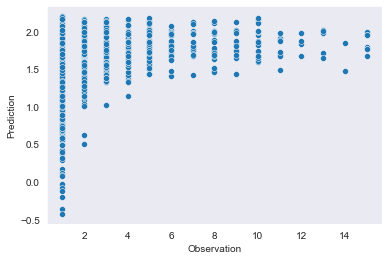

In [78]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(x = y_test, y = pred_test_rr)
plot.set(xlabel='Observation', ylabel='Prediction')

# 4.1 METHOD 3

### What assumptions need to be verified at this step?
To minimizes prediction error for a quantitative response variable.

### What algorithm did you choose?
Lasso Regression

### Why you choose this algorithm?
Improve the prediction accuracy and interpretability of regression models.

### What metric can measure the quality of your algorithm?
Mean squared error

### What is the outcome?
Mean squared error is larger than of linear regression so linear regression performed better.

### Analysis and discussion:
Lasso regression was expected to reduce prediction error but it in our case, it increases the error

# Lasso Regression

In [73]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print("Mean squared Error for Training",mean_squared_error(y_train,pred_train_lasso))
print("R2 score for Training",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(x_test)

Mean squared Error for Training 2.9705124355835673
R2 score for Training 0.029428511341068497


In [74]:
print("Mean squared Error for Testing",mean_squared_error(y_test,pred_test_lasso)) 
print("R2 score on Testing data",r2_score(y_test, pred_test_lasso))

Mean squared Error for Testing 2.7111310797791837
R2 score on Testing data 0.030422665495603907


[Text(0.5, 0, 'Observation'), Text(0, 0.5, 'Prediction')]

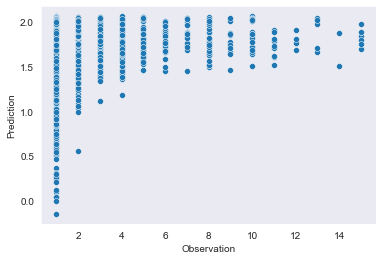

In [92]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(x = y_test, y = pred_test_lasso)
plot.set(xlabel='Observation', ylabel='Prediction')

# 4.4 METHOD 4

# Random Forest Regressor

### 1. What assumptions need to be verified at this step?
To improve the predictive accuracy and control over-fitting. Fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging.

### 2. What algorithm did you choose?
Random Forest Regressor

### 3. Why you choose this algorithm?
Generally, Random Forests produce better results, work well on large datasets. Also, its an ensemble model i.e. it creates multiple decision trees and merges them together to get a more accurate and stable prediction.¶

### 4. What metric can measure the quality of your algorithm?
MAE (Mean Absolute Error). RMSE is also calculated for comparision with other models.

### 5. What is the outcome?
As expected, the MAE and RSME values for this model is better any other models here. Data is divided into 9:1 train-test data split. Before doing the train-test split IsolationForest is applied to remove any possible outliers, otherwise RMSE scores will get adversely affected.

### 6. Analysis and discussion:
Since this an ensemble method there is very little chance of overfitting.
Data is normalized so that all columns are kept at same scale to any kind of unwanted bias in the model.

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer

rfr_pipeline = Pipeline(steps=[
    ("normalize", Normalizer()),
    ("model", RandomForestRegressor(n_estimators = 100, random_state = 0))
])

rfr_pipeline.fit(x_train, y_train)
regressor_preds = rfr_pipeline.predict(x_test)
regression_metrics(regressor_preds)

Mean absolute error = 0.87
Mean squared error = 2.74
Root Mean squared error = 1.66


[Text(0.5, 0, 'Observation'), Text(0, 0.5, 'Prediction')]

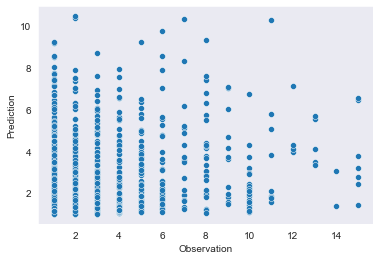

In [84]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(x = y_test, y = regressor_preds)
plot.set(xlabel='Observation', ylabel='Prediction')

We can see from graph that model is performing better than others

# 4.5 METHOD 5

### 1. What assumptions need to be verified at this step?
SVM's are very good when we have no idea on the data. As we have non-linear data so it will be a great fit. Also, it scales relatively well to high dimensional data.

### 2. What algorithm did you choose?
SVM Regression

### 3. What algorithm did you choose?
One way to simplify the problem of predicting number of incident is, we can say that it doesn't really required to predict the most accuarte number of incidents that may happen in future because the efforts and resources that needs to be put in by authroities to handle/avoid criminal incidents is going to be approximately same. For example, lets say if model predicts that number of incidents could be 5 based on input parameters but in reality number of incidents happened to be 3, the resources that needs to put by the authorities will be approximately similar for both cases. So we can say that we are only concerned about minimizing the error and making sure it is in some acceptable range. This makes the SVM regressor ideal candidate.

### 4. What metric can measure the quality of your algorithm?
RMSE [Root Mean Squared Error] and MAE [Mean Absolute Error]

### 5. What is the outcome?
Data is divided into 9:1 train-test data split. Before doing the train-test split IsolationForest is applied to remove any possible outliers, otherwise RMSE scores will get adversely affected.<br>
RSME values for this model is close to Random Forest Regressor.

### 6. Analysis and discussion:
Root Mean squared error = 1.76 which is good but mean squared error is far from 0 which indicates that this might not be the best fit.

# SVM Regressor

In [82]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

sv_pipeline = Pipeline(steps=[
    ("normalize", Normalizer()),
    ("scale", StandardScaler()),
    ("model", SVR(kernel='rbf'))
])

sv_pipeline.fit(x_train,y_train)
svm_preds = sv_pipeline.predict(x_test)
regression_metrics(svm_preds)

Mean absolute error = 0.69
Mean squared error = 3.09
Root Mean squared error = 1.76


[Text(0.5, 0, 'Observation'), Text(0, 0.5, 'Prediction')]

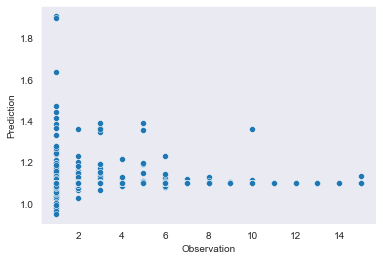

In [85]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(x = y_test, y = svm_preds)
plot.set(xlabel='Observation', ylabel='Prediction')

From figure, we can see that model is incorrectly predicting, performing same as linear regression as given by mean squared error.

# 4.6 METHOD 6 

<b><h3>1. What assumptions need to be verified at this step?</h3></b>
In neural network, we don't assume any underlying pattern for the data excluding GAN's. We are forcing the patterns to be captured using a almost exhaustive search.

<b><h3>2. What algorithm did you choose?</h3></b>
Neural Networks

<b><h3>3. Why you choose this algorithm?</h3></b>
We know that data have non-linear relationships. Neural Network are good with learning functions which don't have very well defined shapes i.e neural network can learn any function or shape/graph. So neural networks can be used to learn the function behind the data and may be able to predict number of incidents in better way.<br>
A neural network is essentially just a linear regression model without an activation function. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks. Neuron requires a non-linear activation function to learn as per the difference w.r.t error.<br>
The non-linear functions do the mappings between the inputs and response variables. Their main purpose is to convert an input signal of a node in an ANN(Artificial Neural Network) to an output signal. That output signal is now used as an input in the next layer in the stack. So we have introduced multiple layers.

<b><h3>4. What metric can measure the quality of your algorithm?</h3></b>
RMSE and MAE

<b><h3>5. What is the outcome?</h3></b>
The prediction metrics are one of the best for NN, only Random Forest Regressor has better RMSE score than this.

<b><h3>6. Analysis and discussion:</h3></b>
- Data is normalized so that all columns are kept at same scale to any kind of unwanted bias in the model.  
- Model uses usual Dense layer with 1 input layer and 4 hidden layers. By Dense means each neuron from current layer is connected to every other neuron in the next layer. They are most commonly used in Neural Networks (NN) and if any connection does not have significant meaning then the weight for that connections becomes more closer to zero i.e they are good with generalisation and can learn any functionn
- ReLU is used as activation function in all layers instead of sigmoid because we have multiple hidden layers here i.e network can be considered as a deep network. Sigmoid has a problem of vanishing gradients i.e. the value gradients start getting closer to zero as we try to create more deeper network. Due to this, model take more time to learn and entire training becomes slow. ReLU don't have this issue.
- Adam optimizer is used instead of Stochastic Gradient Decent because its faster option and does not require much of hyperparameter tuning. 
- The learning rate of NN is decreased with subsequent epoch, this is usually referred as Exponential Decay. This is done so that model don't get overfit and it helps us achieve training with desirable learning rate.

# Neural Networks

In [87]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [86]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import normalize

network = Sequential()
network.add(Dense(20, input_shape=(20,), activation='relu'))
network.add(Dense(18, activation='relu'))
network.add(Dense(16, activation='relu'))
network.add(Dense(14, activation='relu'))
network.add(Dense(12, activation='relu'))

decay_learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = tf.keras.optimizers.Adam(learning_rate=decay_learning_rate)
network.compile(optimizer=optimizer, loss='mse', metrics=[
    tf.keras.metrics.RootMeanSquaredError(),
    # tf.keras.metrics.MeanSquaredError(),
    tf.keras.metrics.MeanAbsoluteError()
])


# Normalize data
nn_iso_X = normalize(iso_X)
nn_x_train, nn_x_test, nn_y_train, nn_y_test = train_test_split(nn_iso_X, iso_Y, test_size = 0.1, random_state=1)

network.fit(
    nn_x_train, 
    nn_y_train, 
    batch_size=32, 
    epochs = 100, 
    verbose = 0, 
    validation_split = 0.2, 
    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)

loss, rmse, mae = network.evaluate(nn_x_test, nn_y_test)
print(f"Loss : {loss}")
print(f"Root Mean Squared Error : {rmse}")
print(f"Mean Absolute Error: {mae}")

119/119 [==============================] - 0s 718us/step - loss: 3.2470 - root_mean_squared_error: 1.8019 - mean_absolute_error: 1.0895
Loss : 3.2469704151153564
Root Mean Squared Error : 1.8019351959228516
Mean Absolute Error: 1.0894997119903564


## Random Forest Regressor on PCA Data

In [97]:
pca_df = pd.read_excel("./data/gun_violence_pca.xlsx")
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.933174,-0.441318,0.086198,0.185647,-0.635190,0.998599,3.038728,-0.636521,-1.364175,0.196372,0.723419,-1.431079,-1.591974,0.548184
1,-1.448177,-0.993400,0.034870,0.918341,-0.077285,1.792401,-0.356301,-0.530701,-1.634370,-0.073065,1.481553,-0.021018,0.476417,0.760583
2,-1.838151,-0.961989,0.026003,0.249858,-1.435546,0.821115,0.089931,-0.515666,-1.602818,0.476756,0.525949,0.449329,-0.569955,0.562190
3,-1.854484,0.024226,0.114794,0.232307,-1.563705,0.717147,0.113700,0.101171,-1.337989,-0.221294,0.579580,-0.474705,-1.006280,0.545495
4,-1.271510,-1.230599,0.078976,-0.520922,-0.340655,2.227472,1.010325,-1.069346,-1.158051,-0.163707,0.294365,0.262696,-0.119068,0.276287


In [100]:
type(pca_df)

pandas.core.frame.DataFrame

In [101]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-1.933174,-0.441318,0.086198,0.185647,-0.635190,0.998599,3.038728,-0.636521,-1.364175,0.196372,0.723419,-1.431079,-1.591974,0.548184
1,-1.448177,-0.993400,0.034870,0.918341,-0.077285,1.792401,-0.356301,-0.530701,-1.634370,-0.073065,1.481553,-0.021018,0.476417,0.760583
2,-1.838151,-0.961989,0.026003,0.249858,-1.435546,0.821115,0.089931,-0.515666,-1.602818,0.476756,0.525949,0.449329,-0.569955,0.562190
3,-1.854484,0.024226,0.114794,0.232307,-1.563705,0.717147,0.113700,0.101171,-1.337989,-0.221294,0.579580,-0.474705,-1.006280,0.545495
4,-1.271510,-1.230599,0.078976,-0.520922,-0.340655,2.227472,1.010325,-1.069346,-1.158051,-0.163707,0.294365,0.262696,-0.119068,0.276287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42177,-0.579006,-0.695711,-0.197146,0.698711,0.446156,-1.902105,1.964710,-0.694776,1.881420,-0.732477,0.225906,0.338737,0.375783,-0.354096
42178,-1.361890,-0.844132,0.025440,0.658015,0.900775,-0.645332,-0.111559,0.381845,0.856119,1.683055,0.646943,-1.097772,-0.241298,-0.548383
42179,-1.214665,2.883246,0.254481,0.766637,0.760484,-0.964143,-0.103180,-1.661282,1.178503,0.964907,0.584202,1.693947,1.184407,-0.751885
42180,-1.415727,-0.913280,0.014807,0.270942,-0.041092,-1.497959,-0.645361,0.749300,1.864216,-0.981170,0.472155,-0.101331,0.062877,-0.820647


In [104]:
# Split the data
xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(pca_df, Y, test_size = 0.1, random_state=1)

In [107]:
rfr_pipeline = Pipeline(steps=[
    ("model", RandomForestRegressor(n_estimators = 100, random_state = 0))
])

rfr_pipeline.fit(xpca_train, ypca_train)
pca_regressor_preds = rfr_pipeline.predict(xpca_test)


[Text(0.5, 0, 'Observation'), Text(0, 0.5, 'Prediction')]

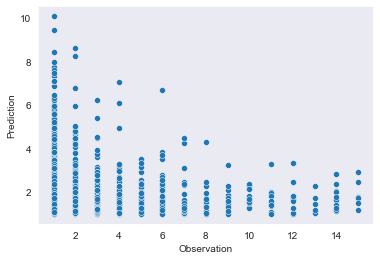

In [108]:
# set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(x = ypca_test, y = pca_regressor_preds)
plot.set(xlabel='Observation', ylabel='Prediction')

In [114]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ypca_test, pca_regressor_preds,multioutput='uniform_average')
print(mae)

1.0619744015169472


### Saving Best Model - Random Forest Regressor

In [116]:
from sklearn import svm
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(rfr_pipeline,f)


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



Examining mpmath: 100%|##########| 313/313 [13:29<00:00,  1.83s/it]
                                                                   

Determining conflicts:   0%|          | 0/313 [00:00<?, ?it/s]
Examining conflict for astroid pylint anaconda python-language-server spyder:   0%|          | 0/313 [00:00<?, ?it/s]
Examining conflict for astroid zope wincertstore et_xmlfile sortedcontainers tifffile conda-package-handling pyodbc sortedcollections isort scipy pycodestyle qdarkstyle ruamel_yaml msgpack-python pillow prometheus_client pysocks entrypoints python-dateutil werkzeug iniconfig pyparsing diff-match-patch wcwidth boto conda h5py jupyterlab snowballstemmer openpyxl simplegeneric win_inet_pton pexpect cytoolz seaborn bcrypt pygments numexpr sip decorator itsdangerous mock fsspec conda-build chardet folium path.py pywinpty python ujson pyopenssl zope.event flask sympy pytz jupyter cycler sphinxcontrib-jsmath wrapt nest-asyncio pydocstyle click clyent anaconda pluggy matplotlib-ba

jupyter_console -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
ujson -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
pyodbc -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
pywinpty -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
pytz -> python -> ca-certificates
zict -> python -> ca-certificates
notebook -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
conda-package-handling -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
krb5 -> openssl[version='>=1.1.1h,<1.1.2a'] -> ca-certificates
filelock -> python -> ca-certificates
sphinx -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
chardet -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
setuptools -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
jsonschema -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
nbconvert -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
alabaster -> python -> ca-certificates
nbformat -> python -> ca-certificates
intervaltree -> python -> ca-cer

ipython -> traitlets[version='>=4.2'] -> enum34
traitlets -> enum34
nbconvert -> traitlets[version='>=4.2'] -> enum34
llvmlite -> enum34
widgetsnbextension -> traitlets[version='>=4.3.1'] -> enum34
attrs -> hypothesis -> enum34
flake8 -> enum34

Package libflang conflicts for:
mkl_random -> numpy[version='>=1.14.6,<2.0a0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
patsy -> numpy[version='>=1.4.0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
scipy -> numpy[version='>=1.14.6,<2.0a0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
numba -> numpy[version='>=1.14.6,<2.0a0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
mkl_fft -> numpy[version='>=1.14.6,<2.0a0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
tifffile -> numpy[version='>=1.15.1'] -> libflang[version='<6.0.0.a0|>=5.0.0']
bkcharts -> numpy[version='>=1.7.1'] -> libflang[version='<6.0.0.a0|>=5.0.0']
blas -> openblas -> libflang[version='<6.0.0.a0|>=5.0.0']
h5py -> numpy[version='>=1.14.6,<2.0a0'] -> libflang[version='<6.0.0.a0|>=5.0.0']
numexpr -> 

### Each person contribution
Aboli Rawanhate - Linear Regression, Random Forest Regressor, Neural Networks, Random Forest on PCA and Model saving<br>
Anthony Felici - Lasso Regression, Ridge Regression, SVM Regressor